In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def mysine(t, amp, freq, phi):
    """
    Solves the sine wave equation; 
    
    f(t; ) = sin*2*np*freq*t + phi), where
    
    amp is the wave amplitude,
    freq is the wave frequency,
    phi is the phase shift,
    
    and t (time) the independent variable
    
    """
    
    return amp* np.sin(2*np.pi*freq*t + phi)

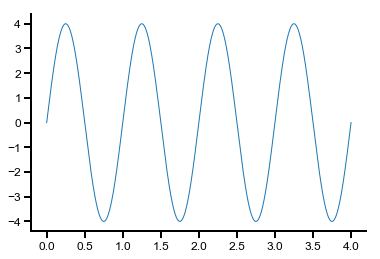

In [4]:
dt = 1/30000 # sampling interval in sec
t = np.arange(0, 4, dt)
myparams = dict(amp = 4, freq = 1, phi = 0)

y = mysine(t, **myparams)

plt.plot(t, y)

<H2>Complex sine waves</H2>

To have an imaginary wave, we simply need to multiply the wave by the imaginary operator, as we do with the real numbers to have the equivalent imaginary numbers. The complex wave will also have a real part, and an imaginary part. In the complex plane, the real axis is the cosine, and the imaginary axis is the sine. Thereby, we can express the complex wave as the combination of real (cosine) and imaginary (sine) parts:

$$
\cos(k) + j\sin(k)
$$

We can use Eulers formula to have this expression in its exponential form:

$$
e^{j k} = \cos(k) + j\sin(k)
$$

and subtitute $k$ by $(2 \pi \upsilon t + \phi)$.

$$
e^{j (2 \pi \upsilon t + \phi)} = \cos(2 \pi \upsilon t + \phi) + j\sin(2 \pi \upsilon t + \phi)
$$


With it, we have another convenient way to express an irrational number, because we have the angle ($k$), and the distancte to the origin ($m$).

$$
me^{j k} = m\cos(k) + mj\sin(k)
$$

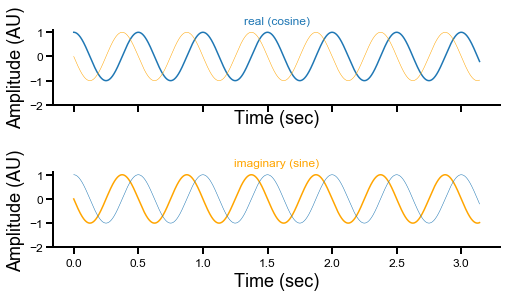

In [53]:
t = np.arange(0,np.pi, 1/30000)

freq = 2 # in Hz
phi = 0
amp = 1
k = 2*np.pi*freq*t + phi

cwv = amp * np.exp(-1j* k) # complex sine wave

fig, ax = plt.subplots(2,1, figsize=(8,4), sharex=True)
ax[0].plot(t, np.real(cwv), lw=1.5)
ax[0].plot(t, np.imag(cwv), lw=0.5, color='orange')
ax[0].set_title('real (cosine)', color='C0')

ax[1].plot(t, np.imag(cwv), color='orange', lw=1.5)
ax[1].plot(t, np.real(cwv), lw=0.5, color='C0')
ax[1].set_title('imaginary (sine)', color='orange')

for myax in ax:
    myax.set_yticks(range(-2,2,1))
    myax.set_xlabel('Time (sec)')
    myax.set_ylabel('Amplitude (AU)')


A complex wave is a time series of imaginary numbers. As a such, it has a real part, and an imaginary part for every time. To visualized a complex wave, we can use a 3D representation. If we plot the imaginary part vs time, we will see a sine wave, and if we plot the real part vs time, we will see a cosine wave. Looking through the real axis you will see the cosine, and through the imaginary axis the sine.

(Text(0.5, 0, 'Time (s)'),
 Text(0.5, 0, 'Real part'),
 Text(0.5, 0, 'Imaginary part'))

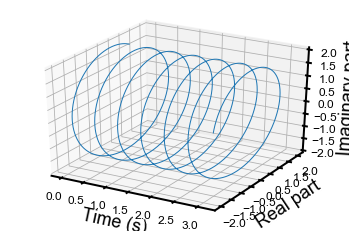

In [12]:
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
fig = plt.figure()
ax = fig.gca(projection ='3d')
ax.plot(t, cwv.real, cwv.imag)
ax.set_xlabel('Time (s)'), ax.set_ylabel('Real part'), ax.set_zlabel('Imaginary part')

If you try to compute the Fourier transform with only real-valued sines (or cosines), you will get a result 
that depends on the phase offset between the sine wave and the signal. Very little variation in phase would have differnt values.

Using complex waves is the solution to it.

<H2>Dot product of sine waves</H2>

Text(3, 7.5, '240000.0000')

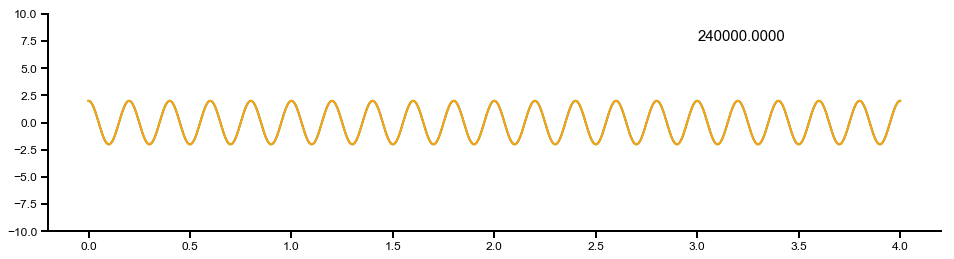

In [6]:
dt = 1/30000 # sampling interval in sec
t = np.arange(0,4, dt)

myparams1 = dict(amp = 2, freq = 5, phi = np.pi/2)
myparams2 = dict(amp = 2, freq = 5, phi = np.pi/2)


sinew1 = mysine(t, **myparams1)
sinew2 = mysine(t, **myparams2)
fig, ax = plt.subplots(1,1, figsize=(16,4))

ax.plot(t, sinew1, lw = 2)
ax.plot(t, sinew2, color='orange', lw=2)
ax.set_ylim(-10,10)
ax.text(3, 7.5, '{:2.4f}'.format(np.dot(sinew1, sinew2)), fontsize=15)

Same amplitudes and phases, but different frequencies yields to zero. Only when the steps are one or 0.5. It is 
because of the sampling rate.

The same frequency but phases differe by PI over two yields zero.

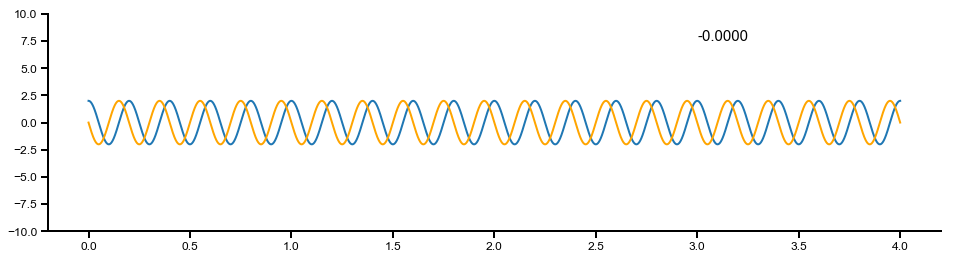

In [7]:
# 
myparams1 = dict(amp = 2, freq = 5, phi = np.pi/2)
myparams2 = dict(amp = 2, freq = 5, phi = 2*np.pi/2) # ortogonal


sinew1 = mysine(t, **myparams1)
sinew2 = mysine(t, **myparams2)
fig, ax = plt.subplots(1,1, figsize=(16,4))

ax.plot(t, sinew1, lw = 2)
ax.plot(t, sinew2, color='orange', lw=2)
ax.set_ylim(-10,10)
ax.text(3, 7.5, '{:2.4f}'.format(np.dot(sinew1, sinew2)), fontsize=15);

Text(0, 0.5, 'Dot product')

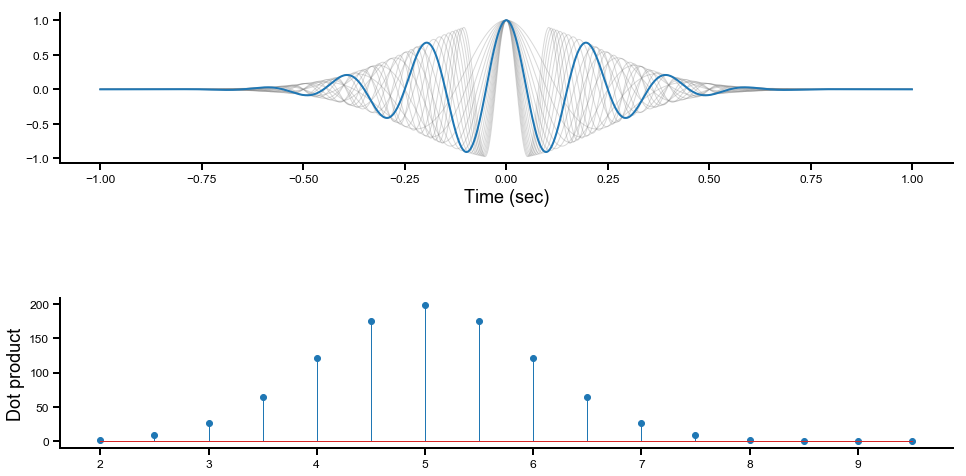

In [34]:
t = np.arange(-1., 1., 1/1000.)
theta = 2*np.pi/4

morlet = lambda f : np.sin(2*np.pi*f*t + theta) * np.exp( (-t**2)/ 0.1) # Gaussian is exp(-t^2/stdev)
signal = morlet(5)

fval = np.arange(2,10,0.5)


fig, ax = plt.subplots(2,1, figsize=(16,8))

dotlist = list()
for i in fval:
    dotlist.append(np.dot(signal,morlet(i)))
    ax[0].plot(t, morlet(i), color='gray', alpha=.3)

ax[0].plot(t, signal, lw = 2)
ax[0].set_xlabel('Time (sec)')
ax[1].stem(fval, dotlist)
ax[1].set_ylabel('Dot product')

<h2>Complex dot product</H2>